In [ ]:
'''Projeto faculdade Uniasselvi feito por Gustavo Barreto 18/11/2021 Creditos: Keith Gali'''

'Projeto faculdade Uniasselvi feito por Gustavo Barreto 18/11/2021 Creditos: Keith Gali'

In [ ]:
# Imports 
import matplotlib.pyplot as plt
import pandas as pd
import os

# Dados de uma loja de eletronicos dos EUA

In [ ]:
# checando apenas as vendas de abril
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
# 12 meses de vendas em apenas um arquivo
vendas = [vendas for vendas in os.listdir('./Sales_Data')]


# Criando um data frame vazio para receber os dados
todas_vendas = pd.DataFrame()


# Concatenando todos os arquivos em apenas 1 unico data frame  
for file in vendas:
    df = pd.read_csv('./Sales_Data/' + file)
    todas_vendas = pd.concat([todas_vendas, df])

    
# Novo data frame com os 12 meses de vendas   
todas_vendas.to_csv('todas_as_vendas.csv') 

FileNotFoundError: ignored

In [ ]:
# Novo data frame
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Limpando o novo Data Frame!

In [ ]:
# Checando por valores NaN
nan_df = todas_vendas[todas_vendas.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


# Removendo valores NaN do Data Frame com .drop()

In [ ]:
todas_vendas = todas_vendas.dropna(how='all')
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Corrija o erro 'or'

In [ ]:
todas_vendas = todas_vendas[todas_vendas['Order Date'].str[0:2]!='Or']
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Convertendo os valores str para numericos

In [ ]:
todas_vendas['Quantity Ordered'] = pd.to_numeric(todas_vendas['Quantity Ordered']) # make int
todas_vendas['Price Each'] = pd.to_numeric(todas_vendas['Price Each'])


# Adicionando uma coluna para os meses



In [ ]:
todas_vendas['Mes'] = todas_vendas['Order Date'].str[0:2]
todas_vendas['Mes'] = pd.to_numeric(todas_vendas['Mes'])
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Adicionando uma coluna de vendas

In [ ]:
todas_vendas['Lucro'] = todas_vendas['Quantity Ordered'] * todas_vendas['Price Each']
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Adicionando uma coluna de cidades

In [ ]:
# Utilizando o .aplly() e uma funcao lambda para pegarmos o nome da cidade entre as virgulas

def get_city(adress):
    'Pega a cidade'
    return adress.split(',')[1]


def get_state(adress):
    'Pega o estado'
    return adress.split(',')[2].split(' ')[1] # Pegando o UF dos estados que estao entre espacos em branco

todas_vendas['Cidades'] = todas_vendas['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
todas_vendas.head()
# Vinculando as cidades com seus devidos estados


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro,Cidades
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Qual foi o mes que teve mais vendas? e qual foi o lucro deste mes?

In [ ]:
meses_vendas = todas_vendas.groupby('Mes').sum().sort_values('Mes')
meses_vendas.head(12)

,Quantity Ordered,Price Each,Lucro
Mes,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<AxesSubplot:title={'center':'Vendas no ano'}, xlabel='Meses', ylabel='Vendas em $USD'>

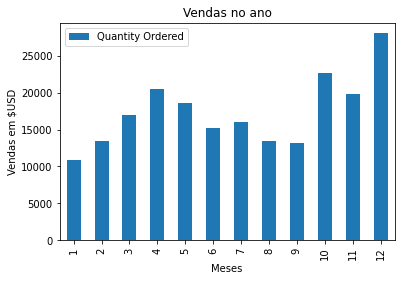

In [ ]:
# Plotando um grafico com os resultados obtidos
meses_vendas.drop(columns=['Price Each', 'Lucro']).plot.bar(title='Vendas no ano',xlabel='Meses',ylabel='Vendas em $USD')

# Qual cidade teve o maior numero de vendas?

In [ ]:
cidade_m_vendas = todas_vendas.groupby('Cidades').sum().sort_values('Lucro', ascending=True)

cidade_m_vendas = cidade_m_vendas.drop(columns=['Price Each', 'Lucro', 'Mes'])
cidade_m_vendas.head(10).sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered
Cidades,
San Francisco (CA),50239
Los Angeles (CA),33289
New York City (NY),27932
Boston (MA),22528
Dallas (TX),16730
Atlanta (GA),16602
Seattle (WA),16553
Portland (OR),11303
Austin (TX),11153


<AxesSubplot:title={'center':'Cidades com maior numero de vendas'}, ylabel='Cidades'>

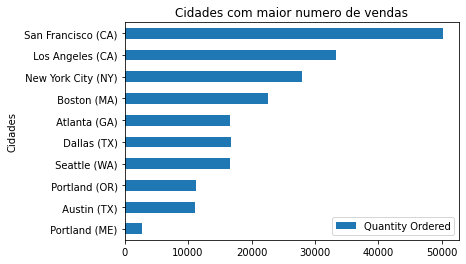

In [ ]:
# Plotando u grafico com os resultados obtidos
cidade_m_vendas.plot.barh(title='Cidades com maior numero de vendas', ylabel='Cidades')


# Qual seria o melhor horario para lançarmos as propagandas para os clientes?

In [ ]:
# convertendo as horas e datas em um datetime object
todas_vendas['Order Date'] = pd.to_datetime(todas_vendas['Order Date'])

In [ ]:
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro,Cidades
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [ ]:
# Adicionando uma colunas apenas para as horas
todas_vendas['Horas'] = todas_vendas['Order Date'].dt.hour
todas_vendas['Minutos']= todas_vendas['Order Date'].dt.minute
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro,Cidades,Horas,Minutos
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [ ]:
horas = todas_vendas.groupby('Horas').sum().sort_values('Minutos', ascending=True)
horas = horas.drop(columns=['Mes', 'Lucro', 'Price Each','Minutos'])
horas.head(24).sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered
Horas,
19,14470
12,14202
11,14005
18,13802
20,13768
13,13685
14,12362
10,12308
21,12244


<AxesSubplot:title={'center':'Horarios com maior quantidade de pedidos'}>

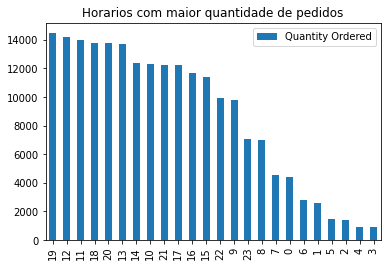

In [ ]:
# Plotando um grafico com os resultados obtidos
horas.sort_values('Quantity Ordered', ascending=False).plot.bar(title='Horarios com maior quantidade de pedidos',xlabel='')
               
# Recomendaria lancar as propagandas por volta de 11pm ou 19pm 

# note: seria melhor plotar em um grafico de linhas para apresentacoes!

# Quais produtos sao vendidos em conjuntos com maior frequencia?

In [ ]:
# Criando uma nova coluna com pedidos em conjunto utilizando f.lambda para juntarmos os conjuntos em apenas 1 linha
todas_vendas['Conjuntos'] = todas_vendas.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [ ]:
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro,Cidades,Horas,Minutos,Conjuntos
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,Wired Headphones


In [ ]:
# Apagando os pedidos repetidos
pedidos = todas_vendas[['Order ID', 'Conjuntos']].drop_duplicates()
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro,Cidades,Horas,Minutos,Conjuntos
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,Wired Headphones


In [ ]:
pedidos.head()

,Order ID,Conjuntos
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [ ]:
from itertools import combinations
'''A combinação é uma coleção de elementos em que a ordem não importa,
ela retorna as subsequências de comprimento dos elementos da entrada iterável'''

from collections import Counter
'''Counter é uma subclasse usada para contar objetos hashable.
Ele cria implicitamente uma tabela hash de um iterável quando invocado'''

count = Counter()


for coluna in pedidos['Conjuntos']:
    coluna_lista = coluna.split(',')
    count.update(Counter(combinations(coluna_lista, 2))) # 2 para vermos os 2 pedidos mais comuns, pode ser 3 ou mais.

    
# Os 10 pedidos em conjuntos mais comuns sao:
for chave, valor in count.most_common(10):
    print(f'Pedidos: {chave} Quantidade: {valor}')    

Pedidos: ('iPhone', 'Lightning Charging Cable') Quantidade: 1005
Pedidos: ('Google Phone', 'USB-C Charging Cable') Quantidade: 987
Pedidos: ('iPhone', 'Wired Headphones') Quantidade: 447
Pedidos: ('Google Phone', 'Wired Headphones') Quantidade: 414
Pedidos: ('Vareebadd Phone', 'USB-C Charging Cable') Quantidade: 361
Pedidos: ('iPhone', 'Apple Airpods Headphones') Quantidade: 360
Pedidos: ('Google Phone', 'Bose SoundSport Headphones') Quantidade: 220
Pedidos: ('USB-C Charging Cable', 'Wired Headphones') Quantidade: 160
Pedidos: ('Vareebadd Phone', 'Wired Headphones') Quantidade: 143
Pedidos: ('Lightning Charging Cable', 'Wired Headphones') Quantidade: 92


# Qual foi o produto com maior numero de vendas? por que voce acha que foi o que mais vendeu?

In [ ]:
todas_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Lucro,Cidades,Horas,Minutos,Conjuntos
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,Wired Headphones


In [ ]:
mais_vendido = todas_vendas.groupby('Product').sum()
mais_vendido = mais_vendido.drop(columns=['Price Each', 'Mes','Lucro','Horas','Minutos'])
mais_vendido.head(20).sort_values('Quantity Ordered',ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


<AxesSubplot:title={'center':'Produtos mais vendidos'}, ylabel='Quantidade de Vendas'>

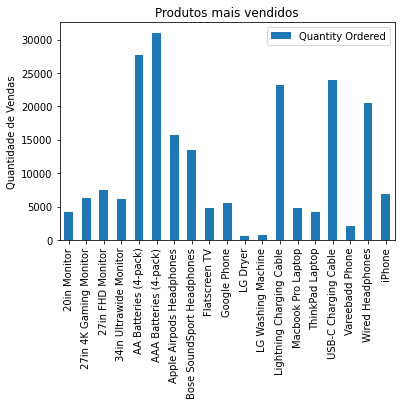

In [ ]:
# Plotando um grafico com os 20 mais vendidos
mais_vendido.head(20).plot.bar(title='Produtos mais vendidos',xlabel='',ylabel='Quantidade de Vendas')